In [1]:
# 데이터 증강(Data Argumentation)
from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(
        rescale=1./255,          # 픽셀 값을 0~1 범위로 변환
        rotation_range=40,       # 40도까지 회전
        width_shift_range=0.2,   # 20%까지 좌우 이동
        height_shift_range=0.2,  # 20%까지 상하 이동
        shear_range=0.2,         # 20%까지 기울임
        zoom_range=0.2,          # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )



In [2]:
# 데이터 증강(Data Argumentation)
from keras.preprocessing.image import ImageDataGenerator

# 학습 데이터 이미지 로드 
train = img_gen.flow_from_directory(
    'training_set/training_set',     # 이미지 디렉토리
    target_size=(100, 100), # 변환할 크기는 가로 100, 세로 100
    color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
    class_mode='binary'     # 고양이 vs. 개로 binary 분류
)    


# 검증 데이터 이미지 로드 
valid = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    'test_set/test_set',
    target_size=(100, 100),
    class_mode='binary',
    shuffle=False)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
# - 이전 시간 소스 복사해서 모델 생성
from keras import Sequential
from keras.layers import Dense, Flatten

m1 = Sequential()
m1.add(Flatten(input_shape=(100, 100, 3)))
m1.add(Dense(1, activation='sigmoid'))
m1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 1)                 30001     
                                                                 
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  - 학습 시키기
from keras.optimizers import Adam, RMSprop

m1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())
history1 = m1.fit_generator(train, validation_data=valid, epochs=5)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_57352\3656149965.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = m1.fit_generator(train, validation_data=valid, epochs=5)


Epoch 1/5
251/251 [==============================] - 37s 146ms/step - loss: 0.8936 - accuracy: 0.5171 - val_loss: 0.7955 - val_accuracy: 0.5329
Epoch 2/5
251/251 [==============================] - 24s 97ms/step - loss: 0.9115 - accuracy: 0.5243 - val_loss: 0.6903 - val_accuracy: 0.5779
Epoch 3/5
251/251 [==============================] - 24s 97ms/step - loss: 0.8368 - accuracy: 0.5334 - val_loss: 0.7069 - val_accuracy: 0.5610
Epoch 4/5
249/251 [============================>.] - ETA: 0s - loss: 0.8695 - accuracy: 0.5354

In [ ]:
# - 그래프 그려 보기(정확도, 손실)
#Keras에서는 모델 학습을 위해 fit() 함수를 사용합니다. 이 때, 리턴값으로 학습 이력(History) 정보를 리턴합니다
#•	loss : 훈련 손실값
#•	acc : 훈련 정확도
#•	val_loss : 검증 손실값
#•	val_acc : 검증 정확도

%matplotlib inline
import matplotlib.pyplot as plt

# TensorFlow 2.5 변경 반영
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')


In [23]:
# 2. 얼리 스톱핑
#  - 앞의 소스로 model2와 history2만들기

from keras.callbacks import EarlyStopping
m3 = Sequential()
m3.add(Flatten(input_shape=(100, 100, 3)))
m3.add(Dense(1, activation='sigmoid'))

m3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())


In [24]:
history3 = m3.fit_generator(train,
                            validation_data=valid,
                            epochs=30,
                            callbacks=[
                                EarlyStopping(monitor = "val_loss", patience=2)
                            ])


Epoch 1/30


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_53712\2155411224.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = m3.fit_generator(train,


251/251 [==============================] - 24s 96ms/step - loss: 0.9091 - accuracy: 0.5132 - val_loss: 0.8975 - val_accuracy: 0.5121
Epoch 2/30
251/251 [==============================] - 24s 96ms/step - loss: 0.9811 - accuracy: 0.5293 - val_loss: 0.9552 - val_accuracy: 0.5151
Epoch 3/30
251/251 [==============================] - 24s 96ms/step - loss: 0.8659 - accuracy: 0.5373 - val_loss: 0.7239 - val_accuracy: 0.5650
Epoch 4/30
251/251 [==============================] - 25s 99ms/step - loss: 0.8916 - accuracy: 0.5345 - val_loss: 0.7049 - val_accuracy: 0.5581
Epoch 5/30
251/251 [==============================] - 25s 98ms/step - loss: 0.9056 - accuracy: 0.5337 - val_loss: 1.2991 - val_accuracy: 0.5007
Epoch 6/30
251/251 [==============================] - 25s 99ms/step - loss: 0.8372 - accuracy: 0.5417 - val_loss: 0.9898 - val_accuracy: 0.5190


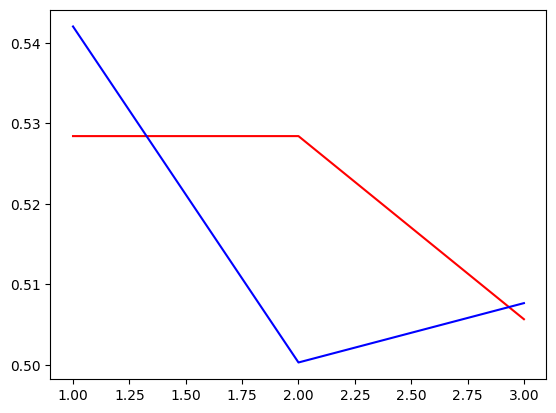

In [18]:
#  - 그래프 그려 보기
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
